In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## 데이터 로드

In [38]:
df_train = pd.read_csv("./data/train.csv")
df_test = pd.read_csv("./data/test.csv")

In [39]:
# 데이터 형태 확인
print(df_train.shape)
print(df_test.shape)

(15035, 21)
(6468, 20)


In [40]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15035 non-null  int64  
 1   date           15035 non-null  object 
 2   price          15035 non-null  float64
 3   bedrooms       15035 non-null  int64  
 4   bathrooms      15035 non-null  float64
 5   sqft_living    15035 non-null  int64  
 6   sqft_lot       15035 non-null  int64  
 7   floors         15035 non-null  float64
 8   waterfront     15035 non-null  int64  
 9   view           15035 non-null  int64  
 10  condition      15035 non-null  int64  
 11  grade          15035 non-null  int64  
 12  sqft_above     15035 non-null  int64  
 13  sqft_basement  15035 non-null  int64  
 14  yr_built       15035 non-null  int64  
 15  yr_renovated   15035 non-null  int64  
 16  zipcode        15035 non-null  int64  
 17  lat            15035 non-null  float64
 18  long  

In [41]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6468 entries, 0 to 6467
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             6468 non-null   int64  
 1   date           6468 non-null   object 
 2   bedrooms       6468 non-null   int64  
 3   bathrooms      6468 non-null   float64
 4   sqft_living    6468 non-null   int64  
 5   sqft_lot       6468 non-null   int64  
 6   floors         6468 non-null   float64
 7   waterfront     6468 non-null   int64  
 8   view           6468 non-null   int64  
 9   condition      6468 non-null   int64  
 10  grade          6468 non-null   int64  
 11  sqft_above     6468 non-null   int64  
 12  sqft_basement  6468 non-null   int64  
 13  yr_built       6468 non-null   int64  
 14  yr_renovated   6468 non-null   int64  
 15  zipcode        6468 non-null   int64  
 16  lat            6468 non-null   float64
 17  long           6468 non-null   float64
 18  sqft_liv

train, test 데이터 모두 결측치가 없음을 확인

### 컬럼(변수) 의미
1. ID : 집을 구분하는 번호
2. date : 집을 구매한 날짜
3. price : 타겟 변수인 집의 가격
4. bedrooms : 침실의 수
5. bathrooms : 집당 화장실 개수
6. sqft_living : 주거 공간의 평방 피트
7. sqft_lot : 부지의 평방 피트
8. floors : 집의 층수
9. waterfront : 집의 전방에 강이 흐르는지 유무 (a.k.a. 리버뷰)
10. view : 집이 얼마나 좋아 보이는지의 정도
11. condition : 집의 전반적인 상태
12. grade : King County grading 시스템 기준으로 매긴 집의 등급
13. sqft_above : 지하실을 제외한 평방 피트
14. sqft_basement : 지하실의 평방 피트
15. yr_built : 집을 지은 년도
16. yr_renovated : 집을 재건축한 년도
17. zipcode : 우편번호
18. lat : 위도
19. long : 경도
20. sqft_living15 : 근처 15 가구의 주거 공간, 평방 피트
21. sqft_lot15 : 근처 15가구의 부지, 평방 피트

In [42]:
for df in [df_train, df_test]:
    # date 컬럼 연/월 추출
    df['date'] = df['date'].astype('str')
    df['date'] = df['date'].apply(lambda x : str(x[:6]))
    df['date'] = df['date'].astype('int')

In [43]:
# 컬럼 확인
print(df_train.columns)
print(df_test.columns)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')
Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [44]:
import seaborn as sns

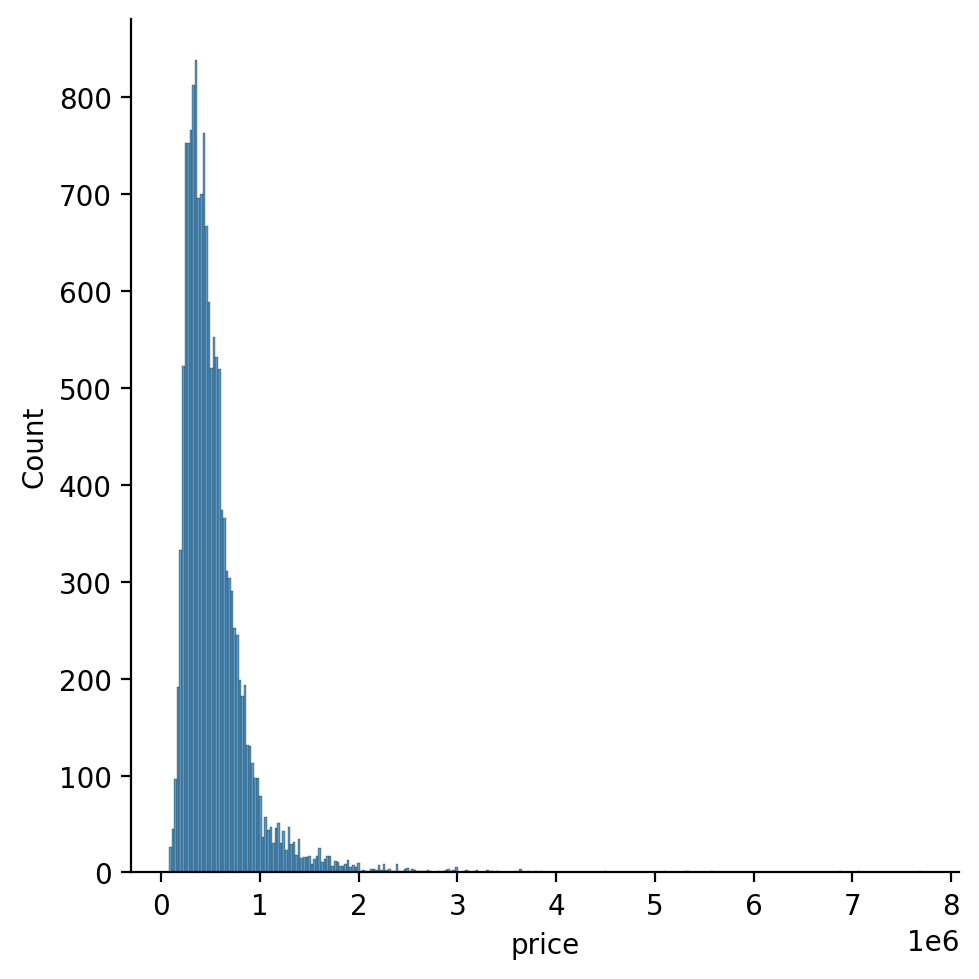

In [45]:
# 라벨 시각화
sns.displot(df_train['price'])
plt.show()

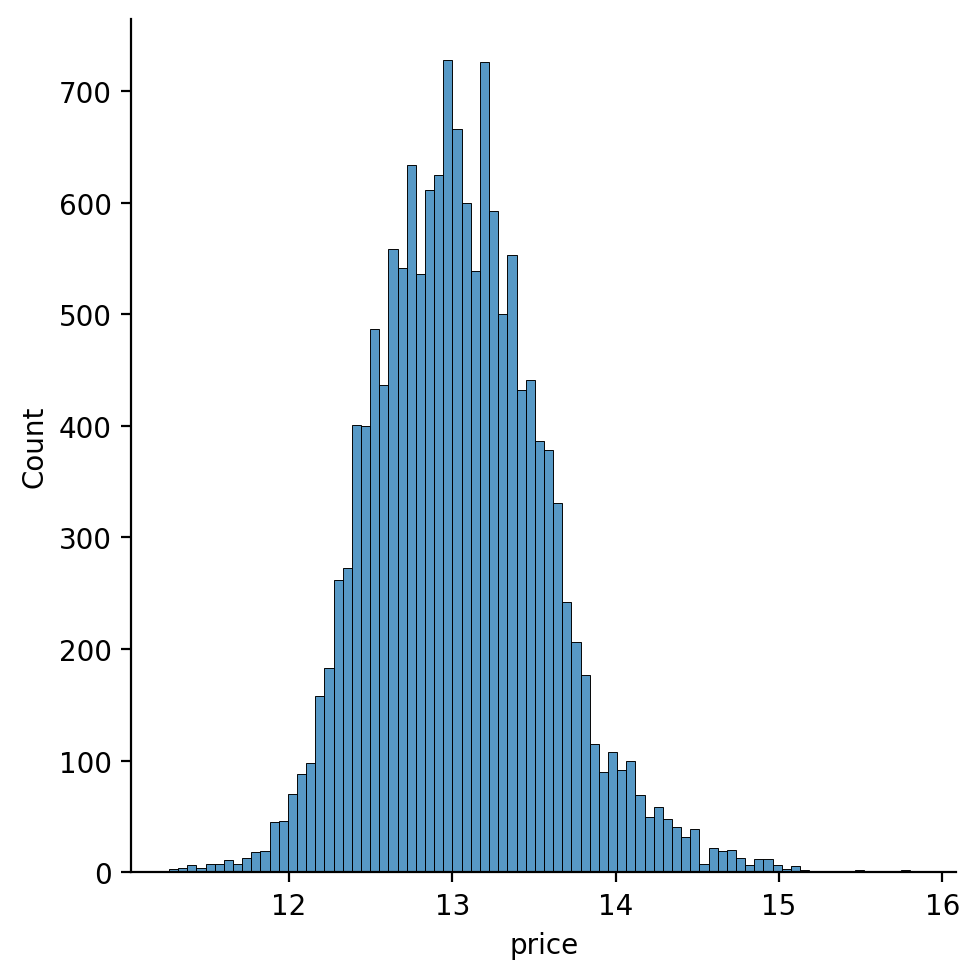

In [46]:
# 로그 변환 후
df_train['price'] = np.log1p(df_train['price'])
sns.displot(df_train['price'])
plt.show()

## EDA

<Axes: >

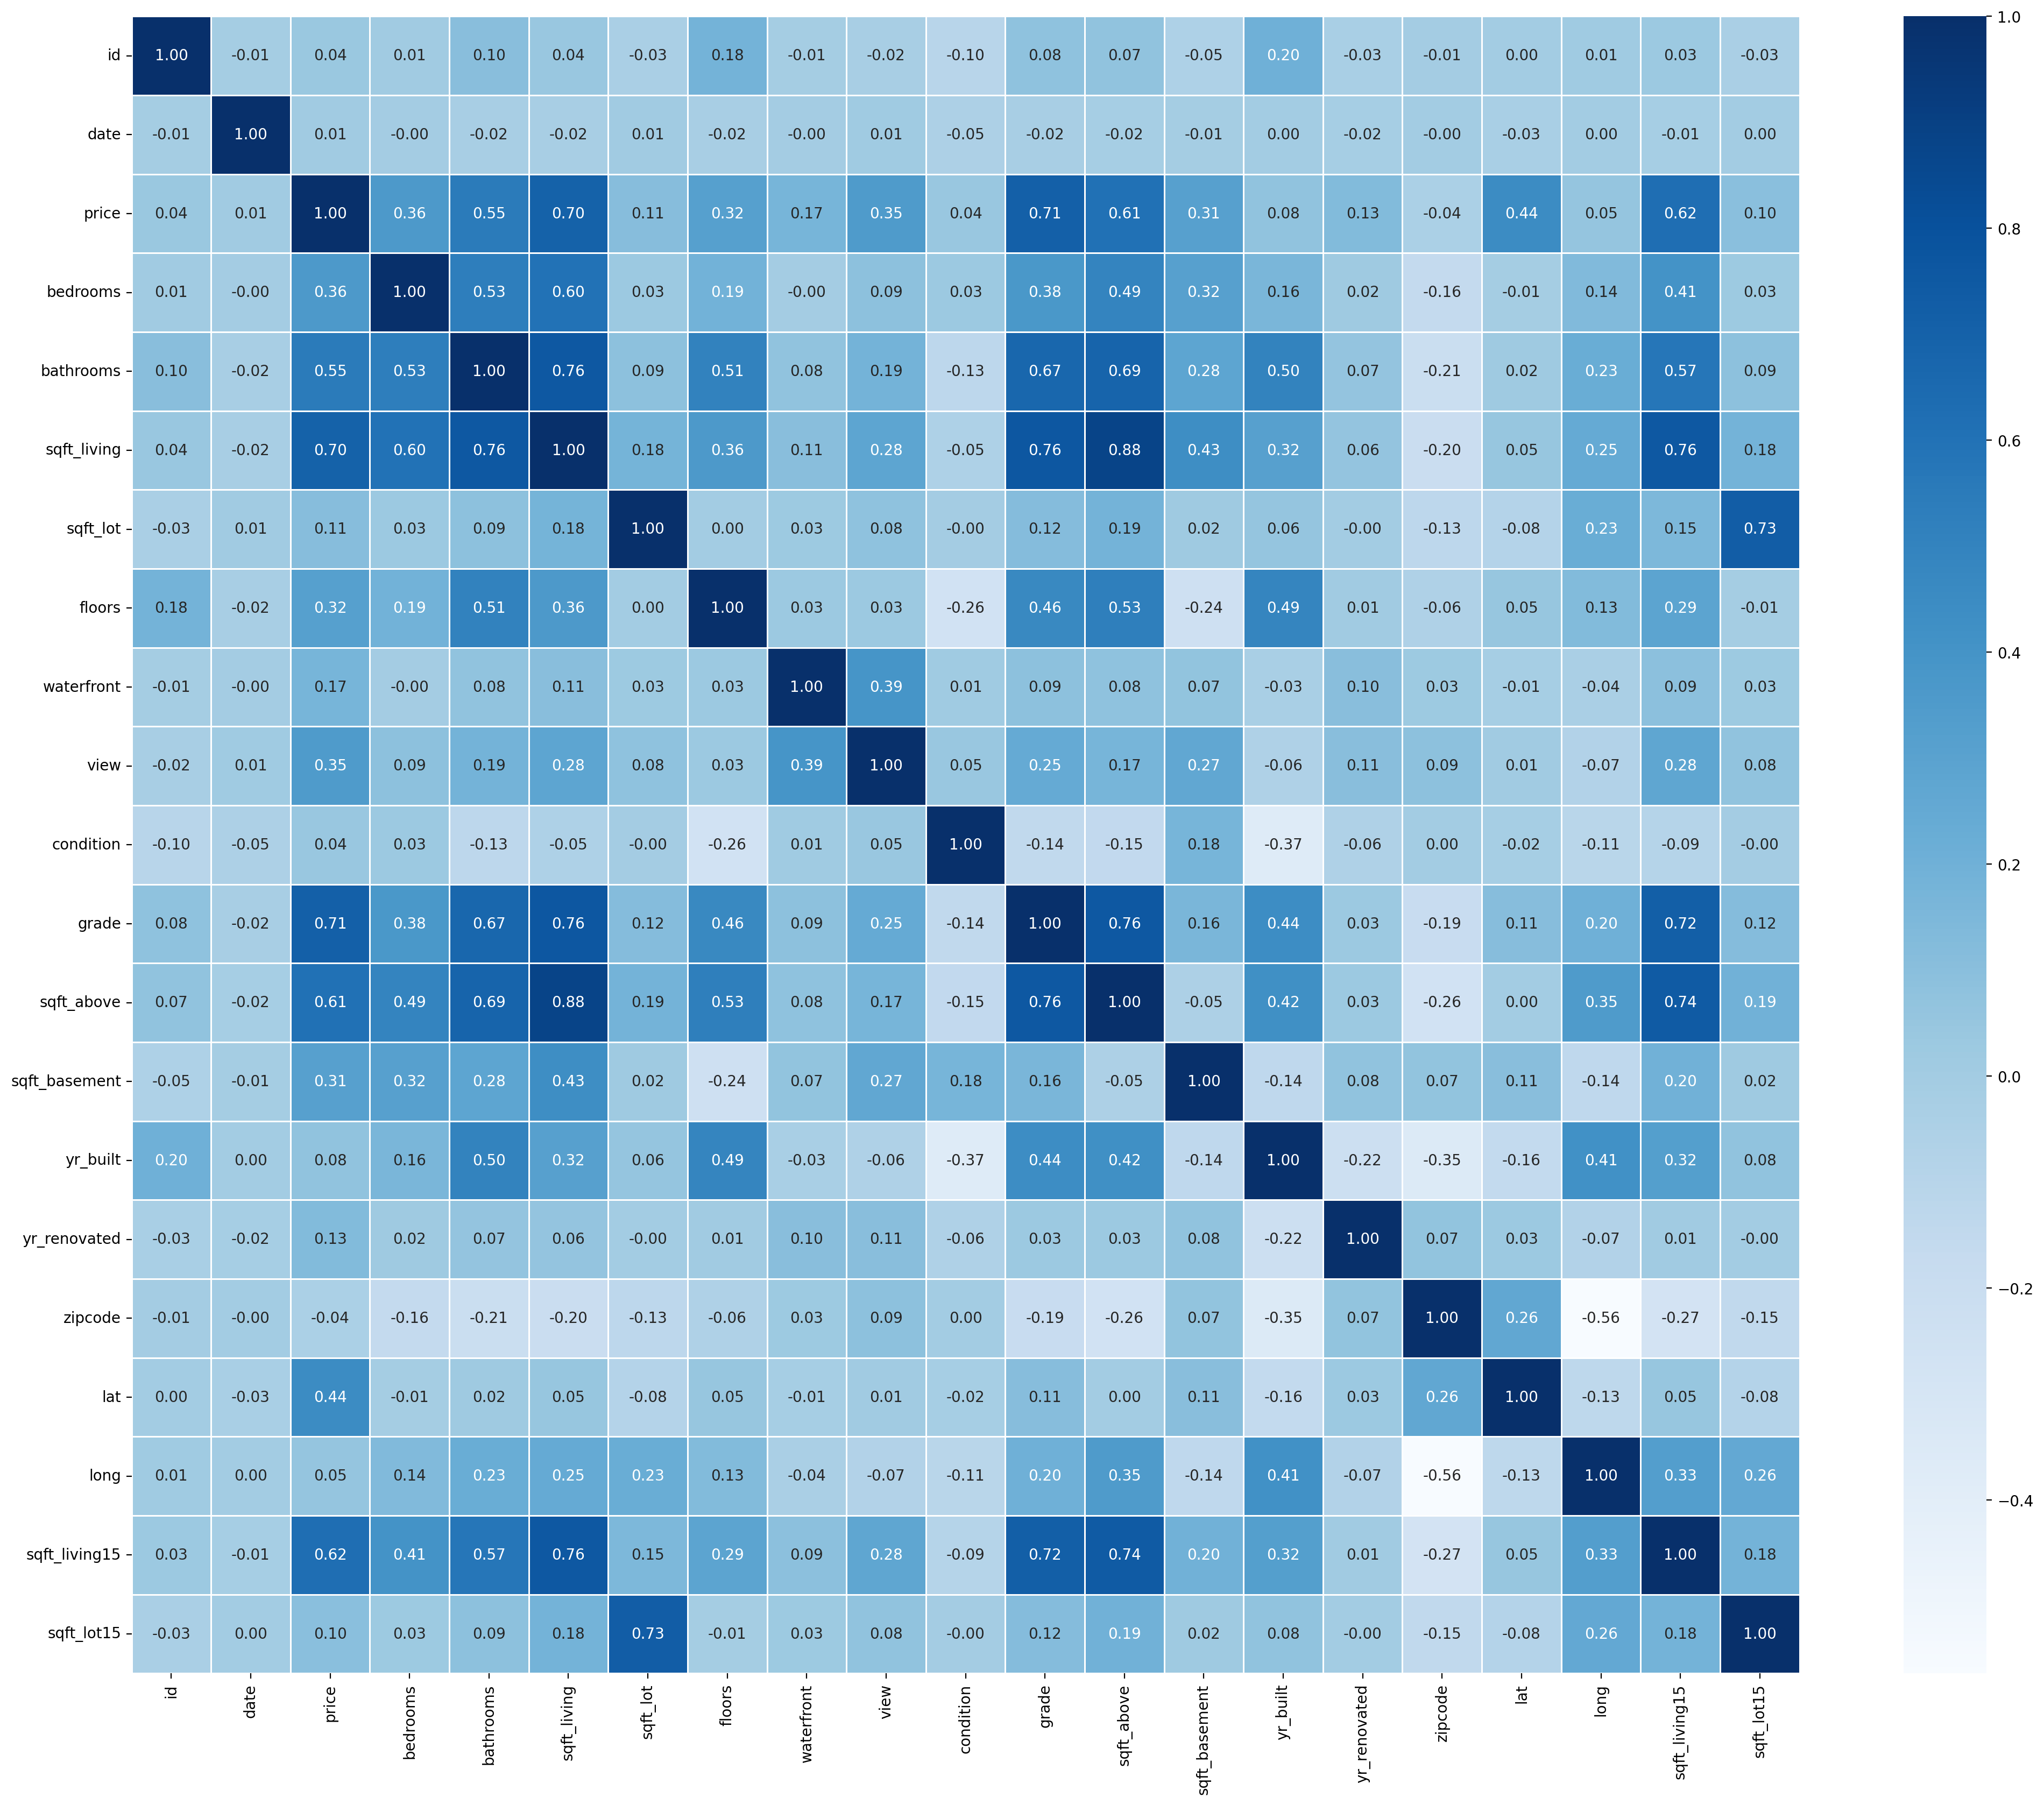

In [47]:
plt.figure(figsize=(25,20))
sns.heatmap(df_train.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

타깃변수인 price와 상관이 높은 변수들 시각화 해보기

<Axes: xlabel='grade', ylabel='price'>

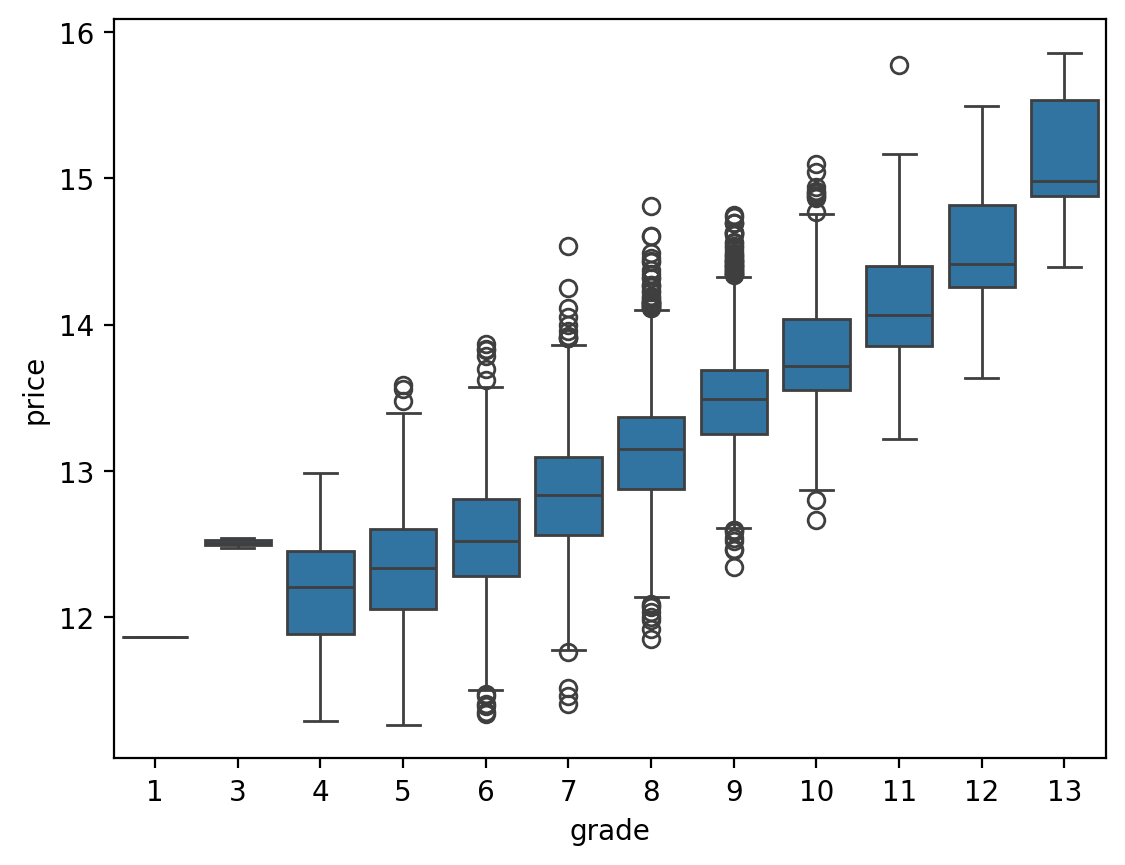

In [48]:
# 상관 1위
# 범주형 데이터
sns.boxplot(x='grade', y="price", data=df_train)

In [49]:
df_train.loc[(df_train['price']>12) & (df_train['grade'] == 3)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2302,2302,201502,12.476104,1,0.75,520,12981,1.0,0,0,...,3,520,0,1920,0,98022,47.2082,-121.995,1340,12233
4123,4123,201411,12.542548,1,0.00,600,24501,1.0,0,0,...,3,600,0,1950,0,98045,47.5316,-121.749,990,22549


<Axes: xlabel='sqft_living', ylabel='price'>

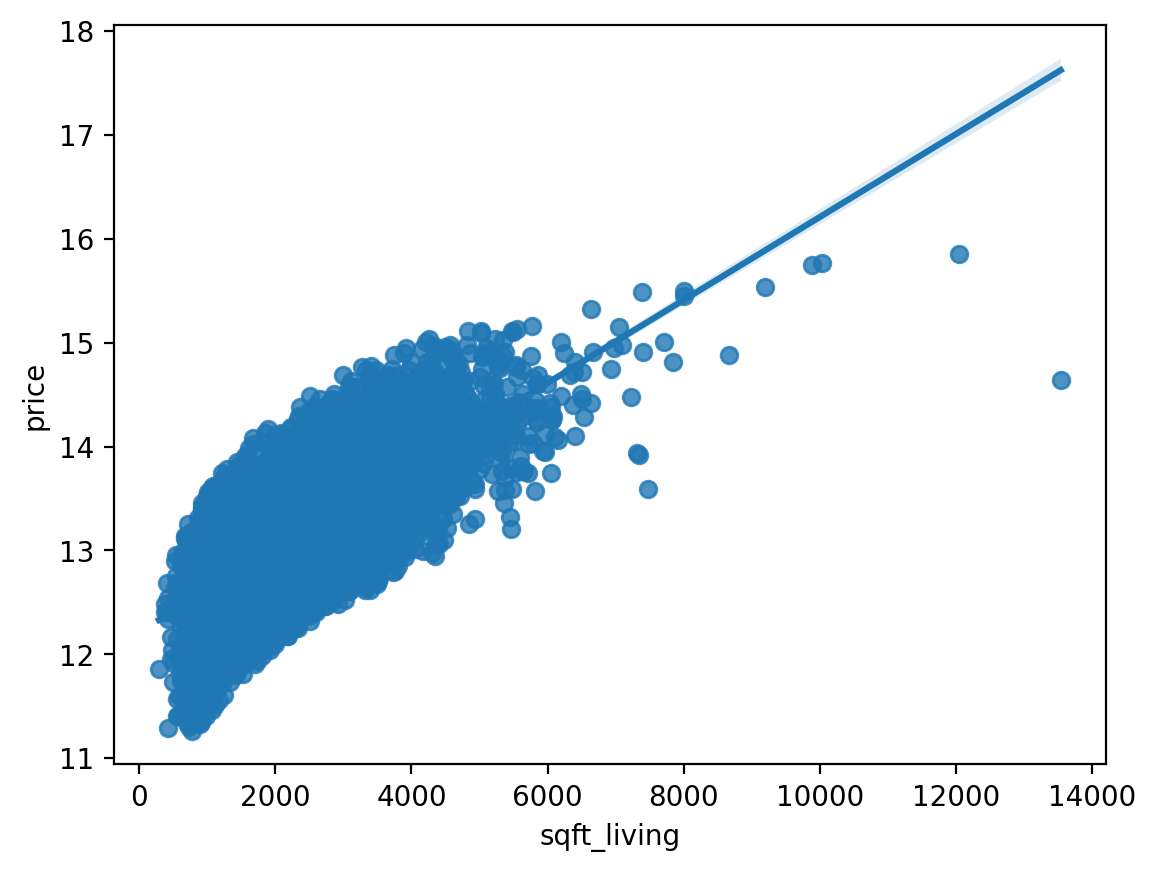

In [50]:
# 상관 2위
sns.regplot(x='sqft_living', y='price', data=df_train)

오른쪽에 13000 이상인 이상치 존재 - 확인

In [51]:
df_train.loc[df_train['sqft_living'] > 13000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8912,8912,201405,14.639686,7,8.0,13540,307752,3.0,0,4,...,12,9410,4130,1999,0,98053,47.6675,-121.986,4850,217800


In [52]:
# 이상치 제거
df_train = df_train.loc[df_train['id']!=8912]

<Axes: xlabel='sqft_living15', ylabel='price'>

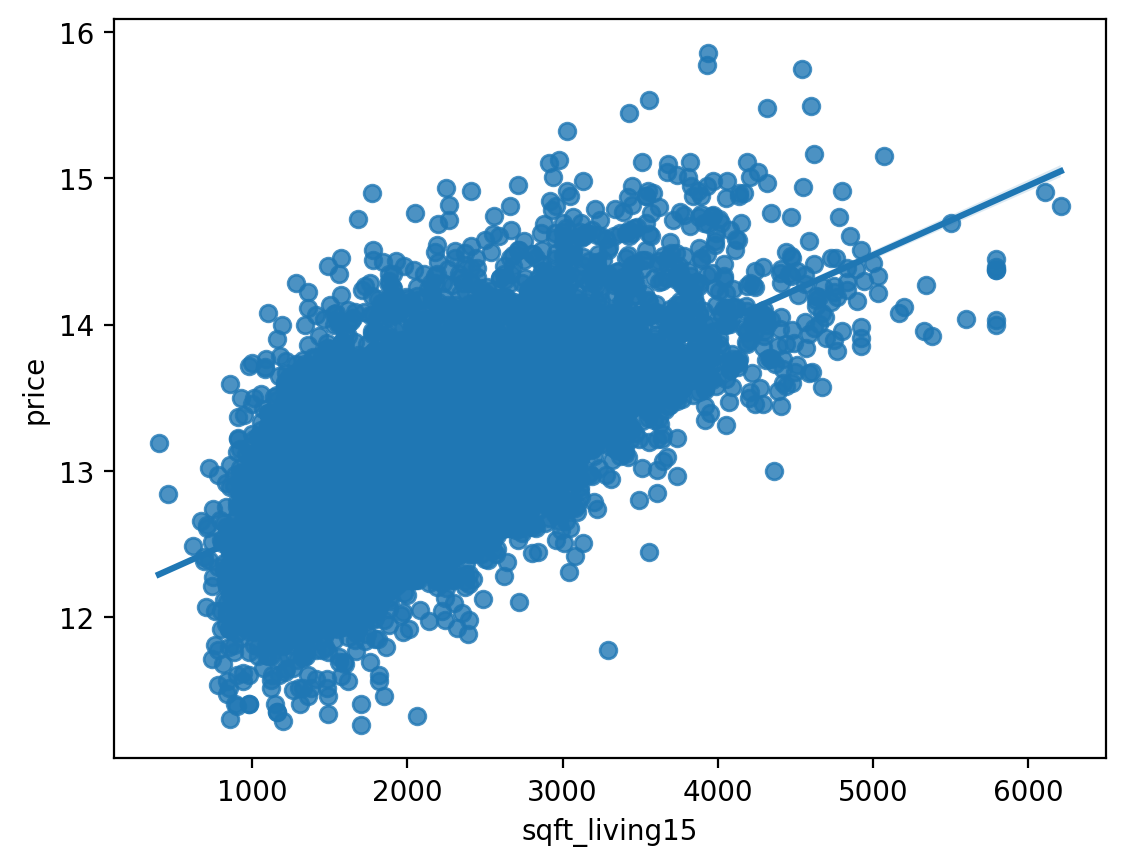

In [53]:
# 상관 3위
sns.regplot(x='sqft_living15', y='price', data=df_train)

<Axes: xlabel='sqft_above', ylabel='price'>

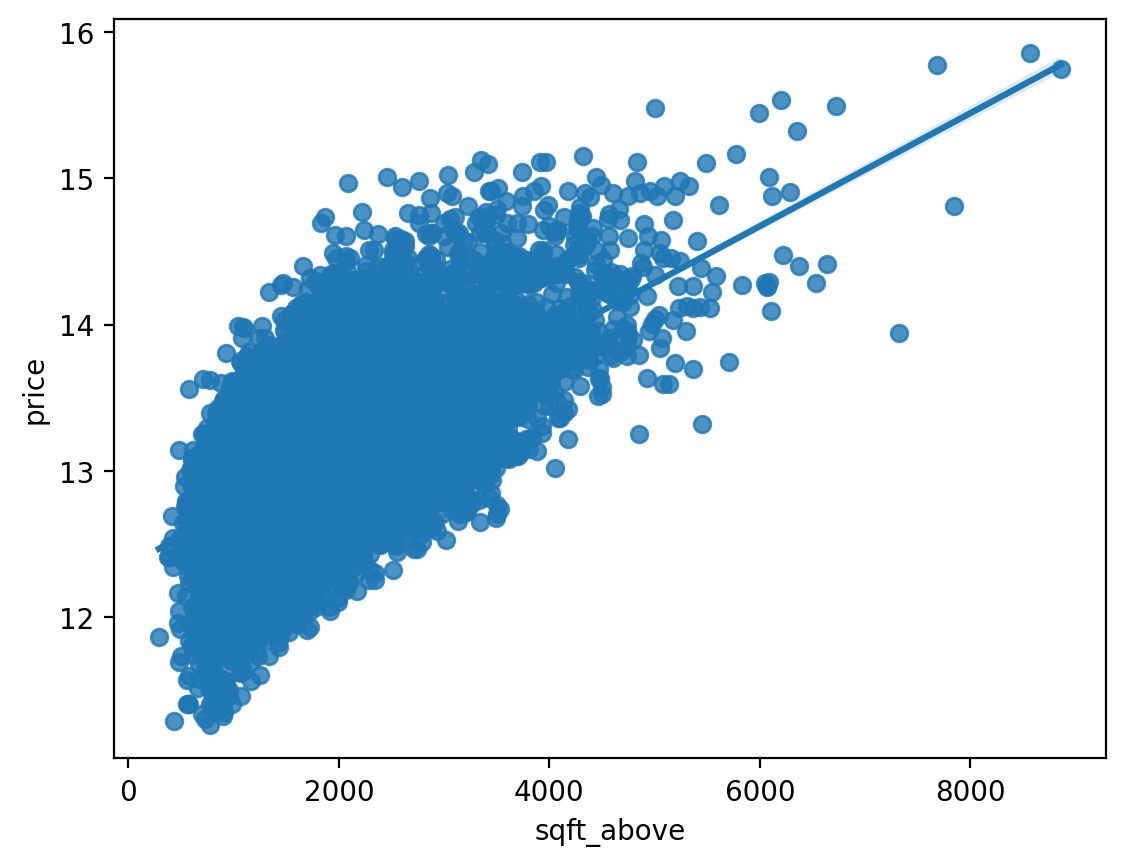

In [54]:
sns.regplot(x='sqft_above', y="price", data=df_train)

<Axes: xlabel='bathrooms', ylabel='price'>

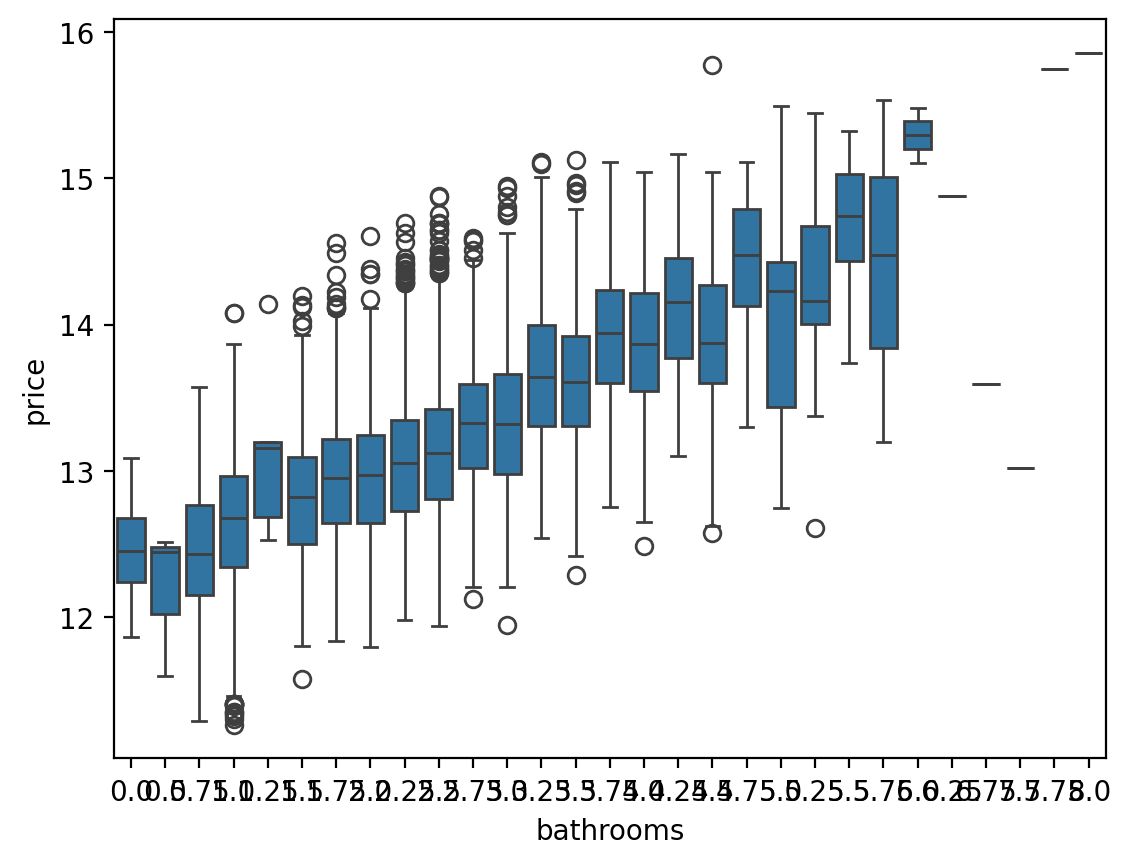

In [55]:
sns.boxplot(x='bathrooms', y="price", data=df_train)

<Axes: xlabel='bedrooms', ylabel='price'>

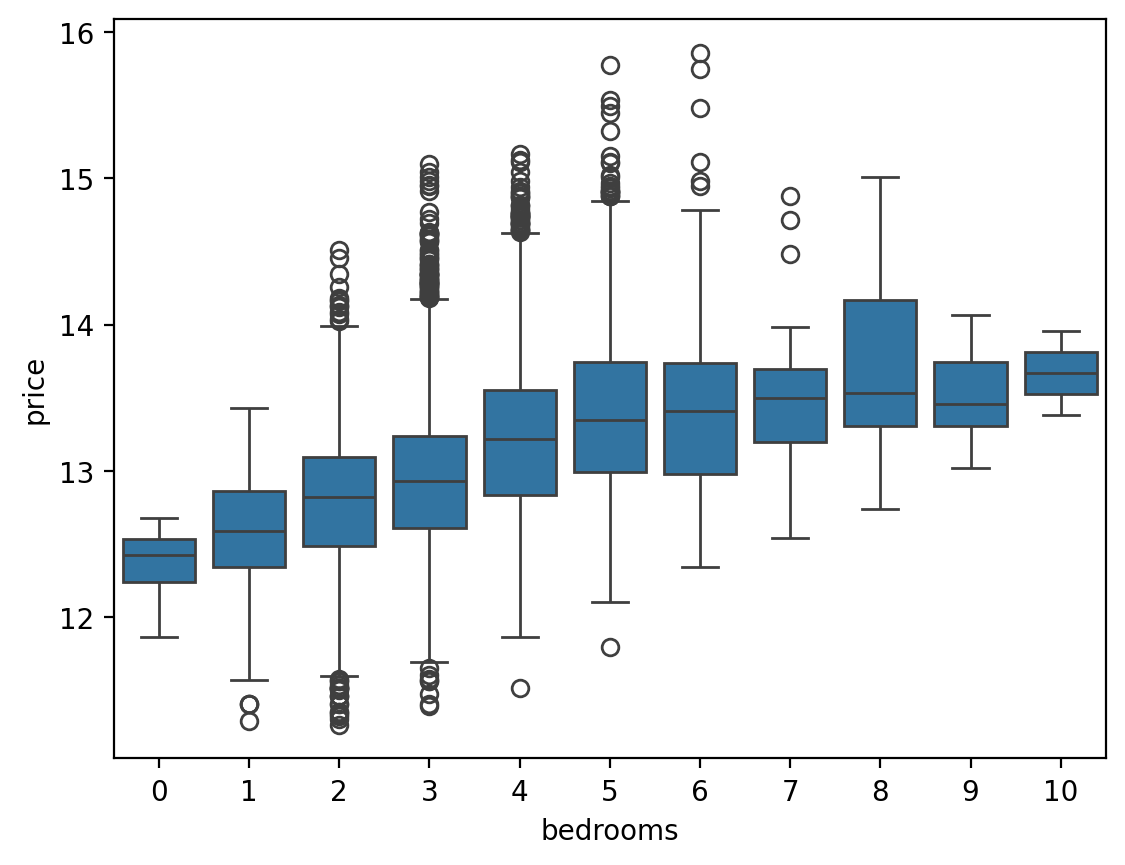

In [56]:
sns.boxplot(x='bedrooms', y="price", data=df_train)

- 대체로 거실, 지상층 등 생활 공간이 가격과의 상관이 높은 것으로 보인다.
- 분산이 있더라도 나름 명확한 상관, 선형 관계를 확인할 수 있다.

In [57]:
y_train = df_train['price']
del df_train['price']

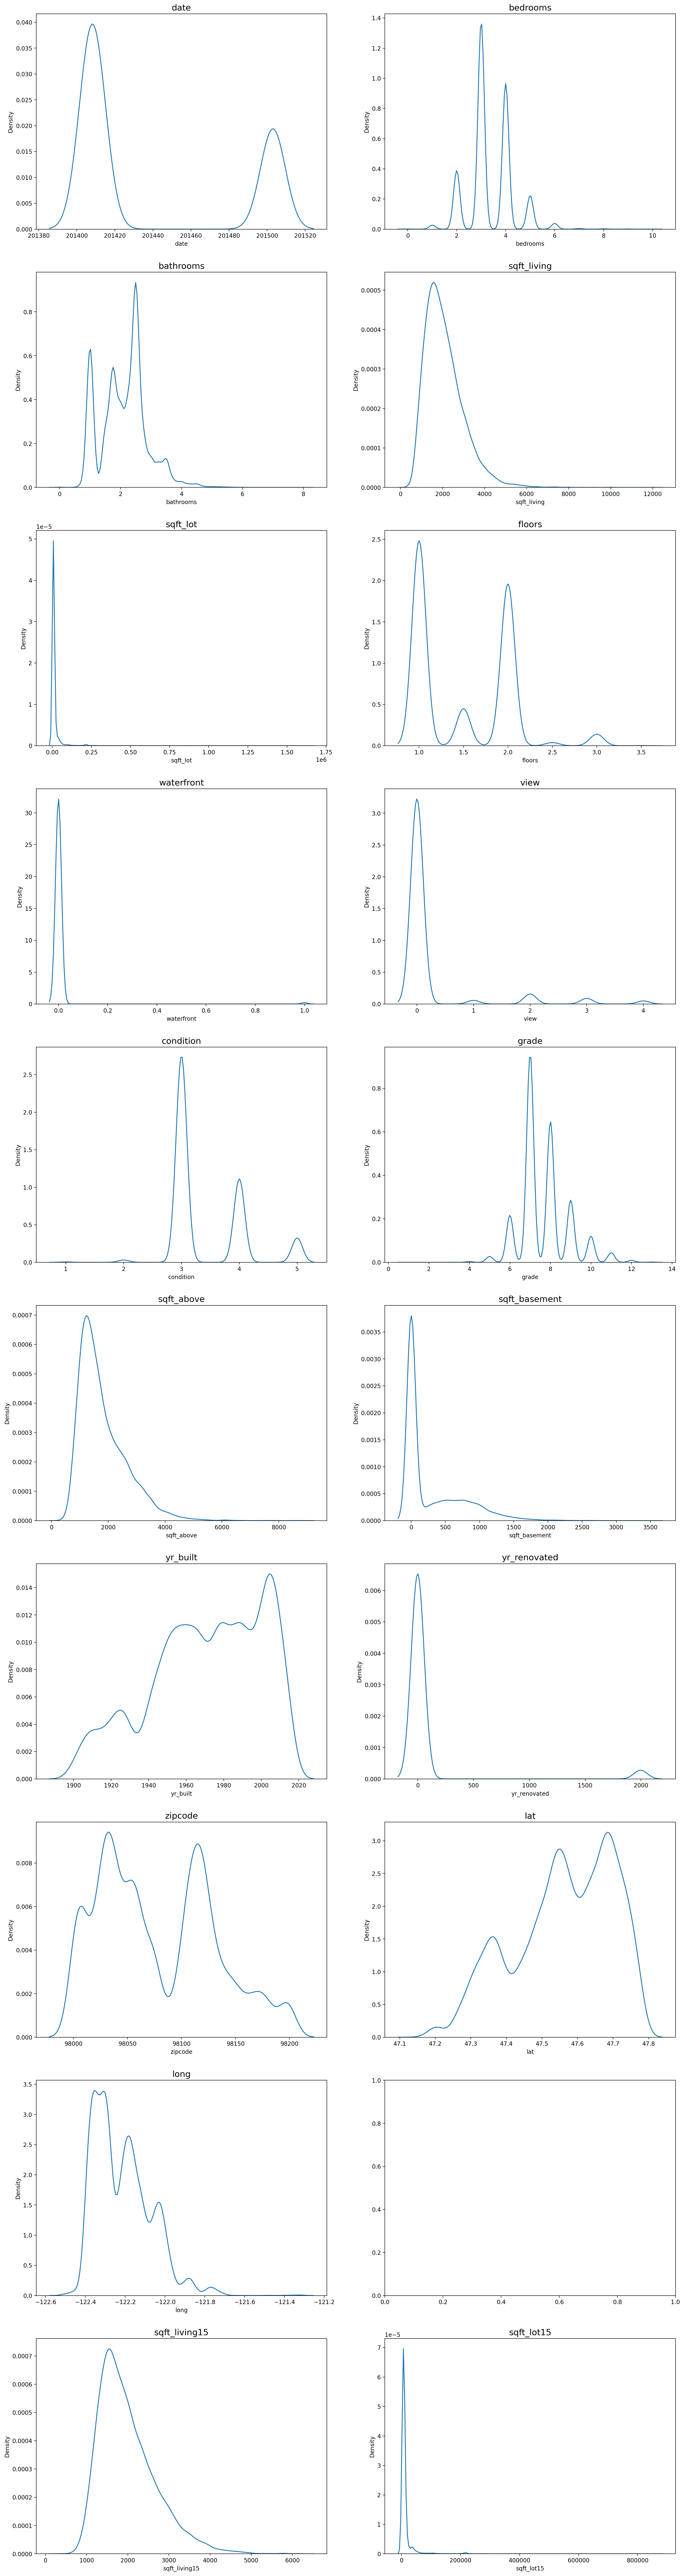

In [58]:
# 각 변수의 분포 확인하기
fig, ax = plt.subplots(10, 2, figsize=(20, 80))

# id 제외 변수 상관 확인
count = 1
columns = df_train.columns
for row in range(10):
    for col in range(2):
        sns.kdeplot(df_train[columns[count]], ax=ax[row][col])
        ax[row][col].set_title(columns[count], fontsize=15)
        count+=1
        if count == 18:
            break

In [59]:
# 분포가 치우친 컬럼만 골라서 로그 변환
import numpy as np

skew_columns = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']

for c in skew_columns:
    df_train[c] = np.log1p(df_train[c].values)
    df_test[c] = np.log1p(df_test[c].values)

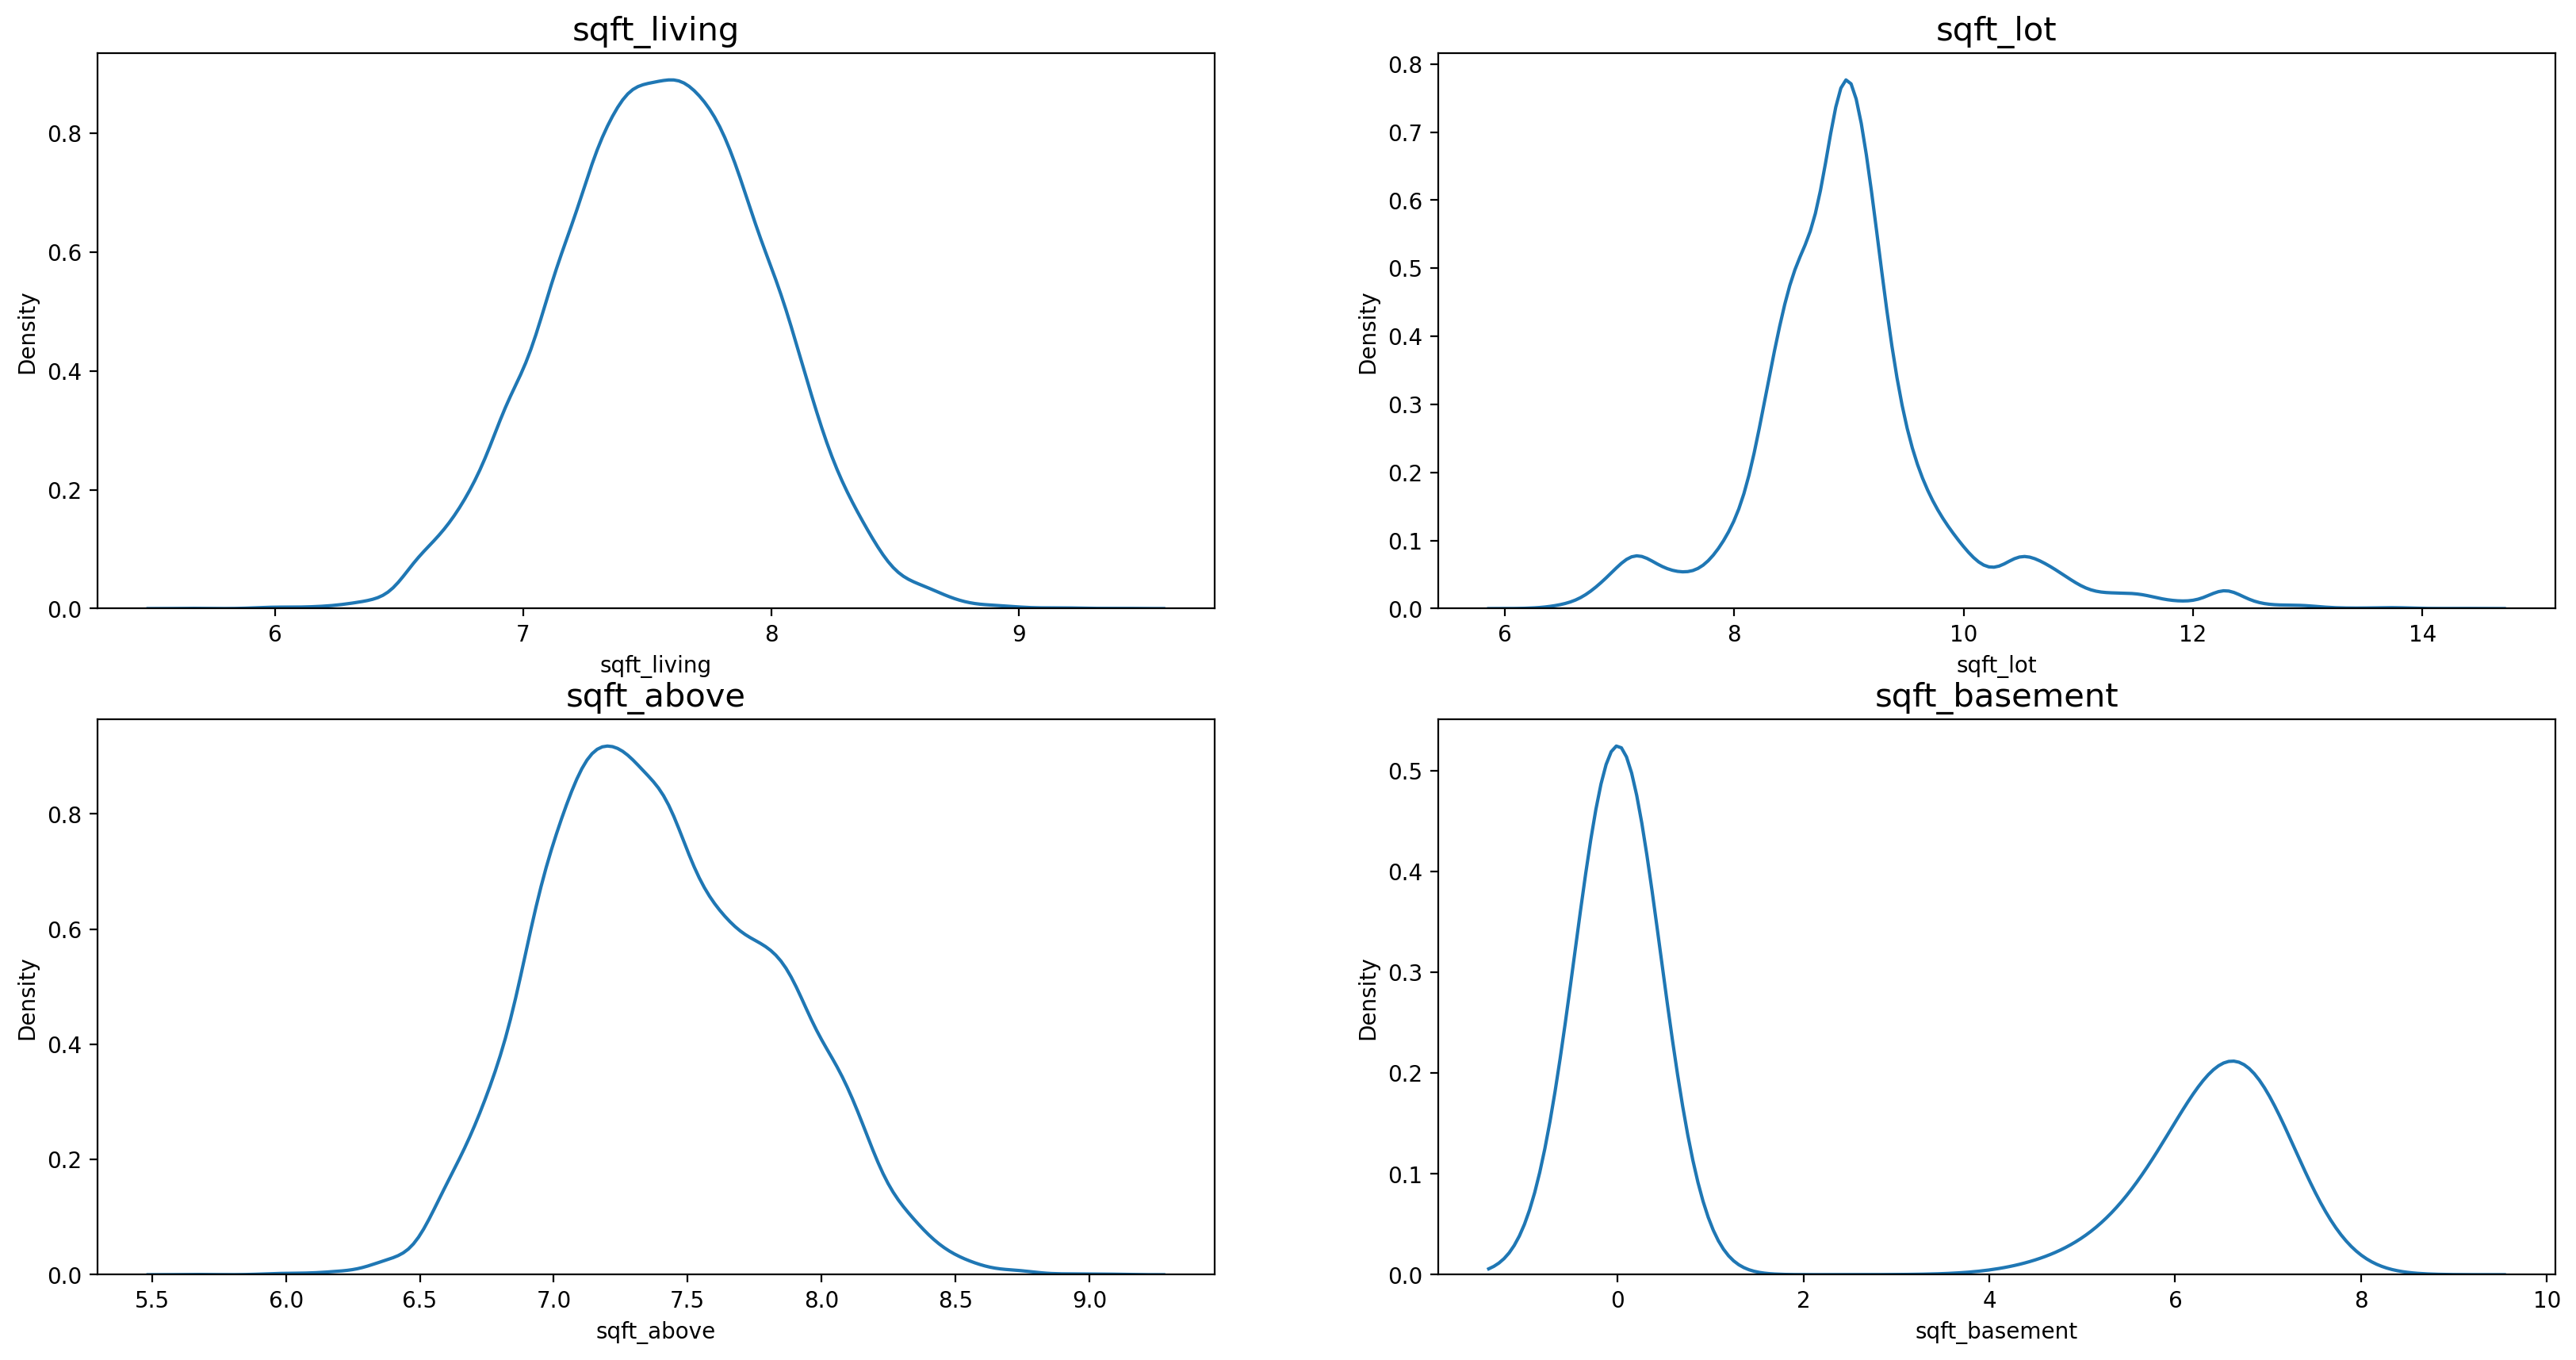

In [60]:
# skew_columns의 분포만 시각화
fig, ax = plt.subplots(2, 2, figsize=(20, 10))

count = 0
for row in range(2):
    for col in range(2):
        sns.kdeplot(df_train[skew_columns[count]], ax=ax[row][col])
        ax[row][col].set_title(skew_columns[count], fontsize=15)
        count+=1
        if count == 4 :
            break

In [61]:
# Kaggle에서 의미있는 특성 참조
for df in [df_train, df_test]:
    # 집 전체 방 갯수
    df['total_rooms'] = df['bedrooms'] + df['bathrooms']
    # 면적 중 주거 공간의 비율
    df['sqft_ratio'] = df['sqft_living'] / df['sqft_lot']
    # 총 면적
    df['sqft_total_size'] = df['sqft_living'] + df['sqft_lot'] + df['sqft_above'] + df['sqft_basement']
    # 면적 대비 주거 공간 비율
    df['sqft_ratio_1'] = df['sqft_living'] / df['sqft_total_size']
    # 근처 15 가구의 주거 공간 비율
    df['sqft_ratio15'] = df['sqft_living15'] / df['sqft_lot15']
    # 재건축 유무
    df['yr_renovated'] = df['yr_renovated'].apply(lambda x: np.nan if x == 0 else x)
    df['yr_renovated'] = df['yr_renovated'].fillna(df['yr_built'])
    df['is_renovated'] = df['yr_renovated'] - df['yr_built']
    df['is_renovated'] = df['is_renovated'].apply(lambda x: 0 if x == 0 else 1)

In [62]:
df_train['price'] = y_train

In [ ]:
# 집값은 비슷한 지역에 영향을 받는다는 것을 코드로 구현한 것 (평당 가격)
# 출처 : https://www.kaggle.com/code/chocozzz/house-price-prediction-eda-updated-2019-03-12
df_train['per_price'] = df_train['price']/df_train['sqft_total_size']
zipcode_price = df_train.groupby(['zipcode'])['per_price'].agg({'mean','var'}).reset_index()
df_train = pd.merge(df_train,zipcode_price,how='left',on='zipcode')
df_test = pd.merge(df_test,zipcode_price,how='left',on='zipcode')
del df_train['per_price']

for df in [df_train,df_test]:
    df['zipcode_mean'] = df['mean'] * df['sqft_total_size']
    df['zipcode_var'] = df['var'] * df['sqft_total_size']
    del df['mean']; del df['var']

## 모델링

In [64]:
import statsmodels.api as sm

train_columns = [c for c in df_train.columns if c not in ['id','price','per_price']]

model = sm.OLS(df_train['price'].values, df_train[train_columns])
result = model.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.846e+06
Date:                Sat, 09 Nov 2024   Prob (F-statistic):                        0.00
Time:                        13:50:46   Log-Likelihood:                          408.96
No. Observations:               15034   AIC:                                     -767.9
Df Residuals:                   15009   BIC:                                     -577.5
Df Model:                          25                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

위에 변수에서 파생된 새로운 변수로 인해 다중공선성이 발생할 우려가 있음.

In [84]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif["Features"] = df_train.columns
vif["VIF Values"] = [variance_inflation_factor(
    df_train.values, i) for i in range(df_train.shape[1])]

vif.sort_values(by='VIF Values',ascending=False)

/Users/ian/opt/anaconda3/envs/tf/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Features,VIF Values
12,sqft_basement,inf
2,bedrooms,inf
3,bathrooms,inf
4,sqft_living,inf
5,sqft_lot,inf
22,sqft_total_size,inf
20,total_rooms,inf
11,sqft_above,inf
15,zipcode,5.210470e+06
1,date,4.166943e+06


In [85]:
# 위에서 vif가 10 이상인 변수는 다중공산성이 있으므로 삭제열에 추가
# id와 yr_renocated(추출완료)는 쓸모없는 변수이므로 삭제열 추가
drop_columns = ['bathrooms','bedrooms','sqft_above','sqft_basement','sqft_living','sqft_lot','yr_renovated']

In [86]:
for df in [df_train, df_test]:
    df.drop(drop_columns, axis=1, inplace=True)     

In [106]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import RandomForestRegressor

In [66]:
# 1. GradientBoostingRegressor 하이퍼파라미터 튜닝
''''
gboost = GradientBoostingRegressor(n_estimators = 1000,
                                    learning_rate=0.1,
                                    max_depth = 10,
                                    subsample = 0.7,
                                    max_features = 0.6,)


gboost_param_grid = {
    'n_estimators': [2000],
    'learning_rate': [0.1],
    'max_depth': [5],
    'min_samples_split': [15],
    'subsample': [1.0],
    'loss': ['squared_error']
}

gboost_grid_search = GridSearchCV(gboost, gboost_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
gboost_grid_search.fit(df_train, y_train)

print(f"Best params for GradientBoostingRegressor: {gboost_grid_search.best_params_}")
best_gboost_model = gboost_grid_search.best_estimator_
'''

'\'\ngboost = GradientBoostingRegressor(n_estimators = 1000,\n                                    learning_rate=0.1,\n                                    max_depth = 10,\n                                    subsample = 0.7,\n                                    max_features = 0.6,)\n\n\ngboost_param_grid = {\n    \'n_estimators\': [2000],\n    \'learning_rate\': [0.1],\n    \'max_depth\': [5],\n    \'min_samples_split\': [15],\n    \'subsample\': [1.0],\n    \'loss\': [\'squared_error\']\n}\n\ngboost_grid_search = GridSearchCV(gboost, gboost_param_grid, cv=5, scoring=\'neg_mean_squared_error\', n_jobs=-1, verbose=1)\ngboost_grid_search.fit(df_train, y_train)\n\nprint(f"Best params for GradientBoostingRegressor: {gboost_grid_search.best_params_}")\nbest_gboost_model = gboost_grid_search.best_estimator_\n'

In [67]:
# 2. XGBoost 하이퍼파라미터 튜닝
'''
xgb_param = {
        'eval_metric': 'rmse',
        'eta': 0.01,
        'max_depth': 10,
        'subsample': 0.7,
        'colsample_bytree': 0.5,
        'silent': 1,
    }

xgboost = xgb.train(xgb_param, num_rounds=100000, ealry_stopping=200, verbose_eval=False)

xgboost_param_grid = {
    'n_estimators': [2500],
    'learning_rate': [0.1],
    'max_depth': [5],
    'subsample': [1.0],
    'colsample_bytree': [1.0],
    'gamma': [0],
    'reg_alpha': [0.1],
    'reg_lambda': [0.1]
}

xgboost_grid_search = GridSearchCV(xgboost, xgboost_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
xgboost_grid_search.fit(df_train, y_train)

print(f"Best params for XGBoost: {xgboost_grid_search.best_params_}")
best_xgboost_model = xgboost_grid_search.best_estimator_
'''

'\nxgb_param = {\n        \'eval_metric\': \'rmse\',\n        \'eta\': 0.01,\n        \'max_depth\': 10,\n        \'subsample\': 0.7,\n        \'colsample_bytree\': 0.5,\n        \'silent\': 1,\n    }\n\nxgboost = xgb.train(xgb_param, num_rounds=100000, ealry_stopping=200, verbose_eval=False)\n\nxgboost_param_grid = {\n    \'n_estimators\': [2500],\n    \'learning_rate\': [0.1],\n    \'max_depth\': [5],\n    \'subsample\': [1.0],\n    \'colsample_bytree\': [1.0],\n    \'gamma\': [0],\n    \'reg_alpha\': [0.1],\n    \'reg_lambda\': [0.1]\n}\n\nxgboost_grid_search = GridSearchCV(xgboost, xgboost_param_grid, cv=5, scoring=\'neg_mean_squared_error\', n_jobs=-1, verbose=1)\nxgboost_grid_search.fit(df_train, y_train)\n\nprint(f"Best params for XGBoost: {xgboost_grid_search.best_params_}")\nbest_xgboost_model = xgboost_grid_search.best_estimator_\n'

In [68]:
# 3. LightGBM 하이퍼파라미터 튜닝
'''
lgb_param = {
        'objective': 'regression',
        'learning_rate': 0.01,
        'max_depth': 10,
        'num_leaves': 31,
        'min_data_in_leaf': 30,
        'bagging_fraction': 0.7,
        'bagging_freq': 1,
        'feature_fraction': 0.2,
        'metric': ['rmse'],
    }

lightgbm = lgb.LGBMRegressor(params=lgb_param, num_rounds=100000, ealry_stopping=200, verbose_eval=False)


lightgbm_param_grid = {
    'n_estimators': [2500, 3000],
    'learning_rate': [0.01],
    'num_leaves': [31, 63],
    'max_depth': [7],
    'min_data_in_leaf': [30, 50],
    'subsample': [1.0],
    'colsample_bytree': [0.8, 1.0]
}

lightgbm_grid_search = GridSearchCV(lightgbm, lightgbm_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
lightgbm_grid_search.fit(df_train, y_train)

print(f"Best params for LightGBM: {lightgbm_grid_search.best_params_}")
best_lightgbm_model = lightgbm_grid_search.best_estimator_
'''

'\nlgb_param = {\n        \'objective\': \'regression\',\n        \'learning_rate\': 0.01,\n        \'max_depth\': 10,\n        \'num_leaves\': 31,\n        \'min_data_in_leaf\': 30,\n        \'bagging_fraction\': 0.7,\n        \'bagging_freq\': 1,\n        \'feature_fraction\': 0.2,\n        \'metric\': [\'rmse\'],\n    }\n\nlightgbm = lgb.LGBMRegressor(params=lgb_param, num_rounds=100000, ealry_stopping=200, verbose_eval=False)\n\n\nlightgbm_param_grid = {\n    \'n_estimators\': [2500, 3000],\n    \'learning_rate\': [0.01],\n    \'num_leaves\': [31, 63],\n    \'max_depth\': [7],\n    \'min_data_in_leaf\': [30, 50],\n    \'subsample\': [1.0],\n    \'colsample_bytree\': [0.8, 1.0]\n}\n\nlightgbm_grid_search = GridSearchCV(lightgbm, lightgbm_param_grid, cv=5, scoring=\'neg_mean_squared_error\', n_jobs=-1, verbose=1)\nlightgbm_grid_search.fit(df_train, y_train)\n\nprint(f"Best params for LightGBM: {lightgbm_grid_search.best_params_}")\nbest_lightgbm_model = lightgbm_grid_search.best_esti

In [116]:
models = [
    {'model': GradientBoostingRegressor(
        n_estimators = 2000,
        learning_rate = 0.1,
        max_depth = 5,
        subsample = 1.0,
        max_features = 0.6,
    ),
    'name':'GradientBoosting1'},

    {'model': GradientBoostingRegressor(
        n_estimators = 2000,
        learning_rate = 0.1,
        max_depth = 7,
        subsample = 1.0,
        max_features = 0.6,
    ),
    'name':'GradientBoosting2'},

    {'model':xgb.XGBRegressor(
        eval_metric = 'rmse',
        n_estimators=1500,
        learning_rate = 0.01,
        max_depth = 10,
        subsample = 0.7,
        colsample_bytree = 0.5,
        silent = 1,
        reg_alpha=0.1,
        reg_lambda = 0.1
    ), 'name':'XGBoost1'},

    {'model':xgb.XGBRegressor(
        eval_metric = 'rmse',
        n_estimators=2500,
        learning_rate = 0.01,
        max_depth = 5,
        subsample = 0.7,
        colsample_bytree = 0.5,
        silent = 1,
        reg_alpha=0.1,
        reg_lambda = 0.1
    ), 'name':'XGBoost2'},

    {'model':xgb.XGBRegressor(
        eval_metric = 'rmse',
        n_estimators=2500,
        learning_rate = 0.01,
        max_depth = 7,
        subsample = 0.7,
        colsample_bytree = 0.5,
        silent = 1,
        reg_alpha=0.1,
        reg_lambda = 0.1
    ), 'name':'XGBoost3'},
    
    {'model':lgb.LGBMRegressor(
        n_estimators=3000,
        objective = 'regression',
        learning_rate = 0.1,
        max_depth = 10,
        num_leaves = 31,
        min_data_in_leaf = 30,
        bagging_fraction = 0.7,
        bagging_freq = 1,
        feature_fraction = 0.2,
    ),'name':'LightGBM1'},

    {'model':lgb.LGBMRegressor(
        n_estimators=3000,
        objective = 'regression',
        learning_rate = 0.1,
        max_depth = 15,
        num_leaves = 31,
        min_data_in_leaf = 30,
        bagging_fraction = 0.7,
        bagging_freq = 1,
        feature_fraction = 0.2,
    ),'name':'LightGBM2'},

    {'model': RandomForestRegressor(
        n_estimators=3000,
        max_depth=10,
        max_features=0.8,
    ), 'name':'RF1'},

    {'model': RandomForestRegressor(
        n_estimators=3000,
        max_depth=15,
        max_features=0.8,
    ), 'name':'RF2'}
]

In [70]:
y_train = df_train['price']
del df_train['price']
y_train

0        12.309987
1        12.100718
2        13.142168
3        12.458779
4        12.583999
           ...    
15029    13.322338
15030    13.822984
15031    12.793862
15032    12.899222
15033    12.691584
Name: price, Length: 15034, dtype: float64

In [91]:
from sklearn.model_selection import KFold, cross_val_score

def get_cv_score(models, df_train, y_train):
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    
    # 모델 리스트 순회
    for m in models:
        # cross_val_score로 교차 검증 수행
        scores = cross_val_score(m['model'], X=df_train, y=y_train, cv=kfold, scoring='neg_mean_squared_error')
        
        # 평균 정확도 계산
        CV_score = np.mean(scores)
        print(f"Model: {m['name']}, CV score: {CV_score:.4f}")

In [92]:
# 여러 모델 입력 시 각 모델에 대한 예측 결과 평균
def AveragingBlending(models, x, y, sub_x):
    for m in models : 
        m['model'].fit(x.values, y)
    
    predictions = np.column_stack([
        m['model'].predict(sub_x)
        for m in models
    ])
    
    return np.mean(predictions, axis=1)

# 모델 학습 및 예측

In [117]:
# 예측값
y_pred = np.expm1(AveragingBlending(models, df_train, y_train, df_test))
print(len(y_pred))
y_pred

/Users/ian/opt/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/ian/opt/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/ian/opt/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/ian/opt/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd

[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Info] Auto-choosing row-wise multi-threading, 

/Users/ian/opt/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/ian/opt/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Info] Auto-choosing row-wise multi-threading, 

/Users/ian/opt/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/ian/opt/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/ian/opt/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/ian/opt/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd

[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30


/Users/ian/opt/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/Users/ian/opt/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/ian/opt/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/ian/opt/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or 

6468


array([ 500616.11889009,  487069.02125736, 1390344.85521102, ...,
        460260.56814261,  320924.10956073,  375894.53895853])

In [118]:
result = pd.DataFrame({
    'id' : df_test.id, 
    'price' : y_pred
})

result.head()

,id,price
0,15035,5.006161e+05
1,15036,4.870690e+05
2,15037,1.390345e+06
3,15038,3.164218e+05
4,15039,3.242992e+05


In [119]:
result.to_csv('submission5.csv', index=False)

### 최고 점수 :
- private : 122108.54581
- public : 128085.49833